In [1]:
%load_ext autoreload
%autoreload 2

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import statistics
from pathlib import Path
import py.NEBTools as nt
from operator import itemgetter


pairspath="/home/adam/code/topcon-md/data/neb/PinholeFileAll/"
nebfolder="/home/adam/code/topcon-md/neb-out/hydrogen_project/"



group=["local-machine-tests/Full_1500-695/"]
group=["local-machine-tests/Full_1.6-135/"] #"farm/6169019/","farm/6169020/","farm/6169021/","farm/6169022/"]#
group=["bc_to_empty_v1/"]
#group=["farm/perpPairs/","farm/parallelPairs/"]

multiplot=[]
clean=False #do this very rarely when you get lots of new data from farm


for g in group:
    
    gpath=nebfolder+g
   
    print(gpath)
    
    
    if clean:
        cleanlist=[] 
        subfolders="farm-folders/"
        subfolders=""   
        print(f"Cleaning the {g+subfolders} directory, this may take a while.")
        for d in Path(gpath+subfolders).rglob('*.csv'):
            cleanlist.append(subfolders+str(d))       
        print(cleanlist) 
        #cleandf=nt.clean_csvs(cleanlist,gpath)
        setdf=nt.csvs_to_df(csvlist)
        nt.clean_pairfiles(setdf,pairspath)
    else:
        csvlist=[]
        i=0
        for d in Path(gpath).glob('**/*.csv'):
            csvlist.append(str(d))
            # if i >1:
            #     break
            # i+=1
            
        print(csvlist)
        #print(csvlist[0])
        setdf=nt.csvs_to_df(csvlist)
#combH=nt.df_combine_H(setdf)   


/home/adam/code/topcon-md/neb-out/hydrogen_project/bc_to_empty_v1/
['/home/adam/code/topcon-md/neb-out/hydrogen_project/bc_to_empty_v1/1.6-143.csv']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
FEB
1.6-143.csv


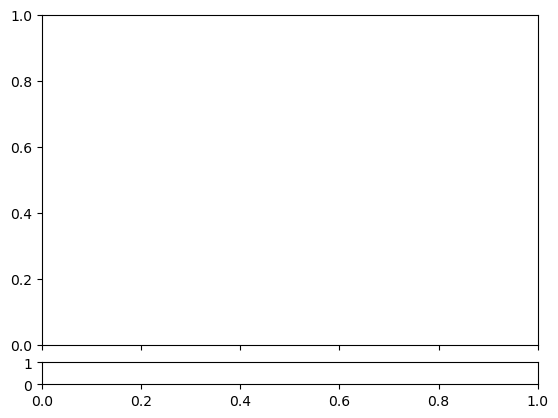

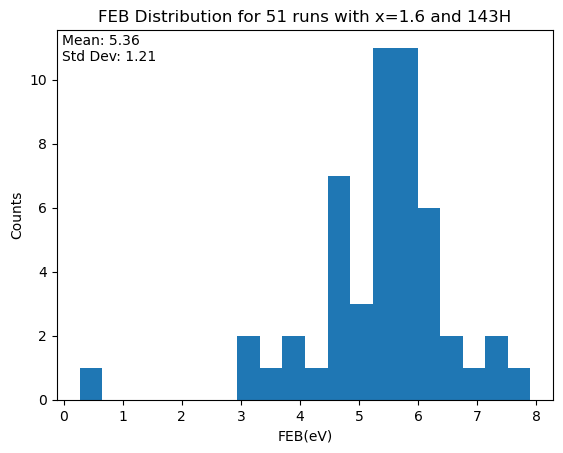

Saved figure with path /home/adam/code/topcon-md/neb-out/analysis-images//individual-dist/FEBvH.pdf


In [2]:
#analysis ploting

%load_ext autoreload
%autoreload 2
# print(setdf[setdf['csvname']=='1.7-44.csv'])
wdf=setdf[setdf['FEB']<10]
# wdf=wdf[wdf['FEB']>.3]
# wdf=wdf[wdf['csvname']=='1.7-117.csv']

# print(wdf[wdf['csvname']=="1.6-381.csv"].to_string())

# wdf=wdf[wdf.apply(nt.limit_zpos_iface,axis=1,args=(False,'iPos',))]

nt.plot_multi_distribution(wdf,["FEB"],plot=True,areal_hydrogen=False)

# nt.dist_from_df(wdf,plot=True)

# nt.dist_from_df(wdf)
# nt.plot_feb_vreplica(wdf)

pair_path="/home/adam/code/topcon-md/data/neb/H_vacancy"
# nt.calc_local_structure(wdf,pair_path)



In [6]:
%load_ext autoreload
%autoreload 2
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pathlib import Path
import py.NEBTools as nt
from operator import itemgetter


path="/home/adam/code/topcon-md/data/neb/"
dfile="H_vacancy/1.6-116.dat"

nt.temp(path,dfile)


: 

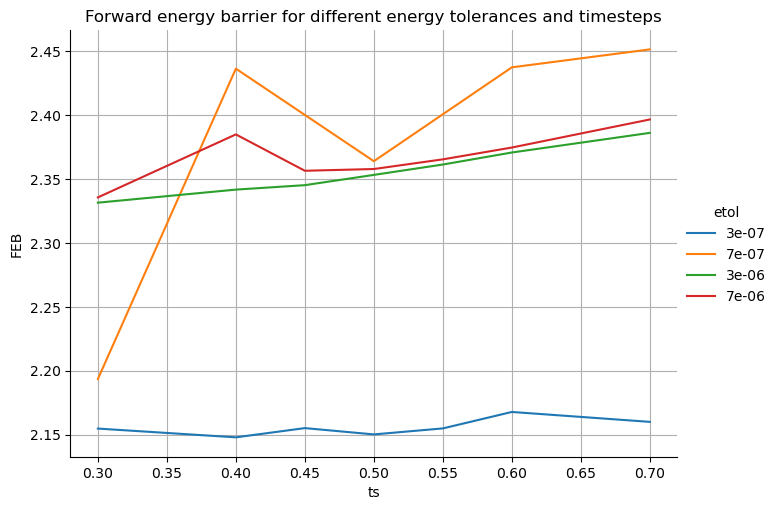

In [10]:
#check convergence


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
import numpy as np

#seaborn.set(style='ticks')


base="/home/adam/code/topcon-md/neb-out/convergence_testing/"
fileList=["sio2_h.csv"]



for f in fileList:
    d=base+f
    data = pandas.read_csv(d)
    #data = pandas.read_csv("/home/agoga/documents/code/topcon-md/output/neb/fixed/4090.csv")
    #data = pandas.read_csv("/home/agoga/documents/code/topcon-md/output/neb/varyTSmin/125.csv")



    data=data[data.etol<3e-5]
    # data=data[data.etol>1e-06]
    # data=data[data.ts>=0.5]
    # data=data[data.ts<=0.6]
    # data = data[data.FEB < 4]

    # data=data[data.etol <3e-5]
    # data=data[data.etol >7e-7]


    sns.relplot(data=data,x="ts",y="FEB",hue="etol", kind="line",aspect=1.4,palette='tab10')#sns.color_palette("Set2"))

    #plt.hlines(y=3.2,color='r',xmin=0.3,xmax=2,linestyles='-.')
    # plt.ylim(top=3.6)
    plt.grid()
    # plt.xticks(np.arange(0.5,0.7,0.1))
    plt.title('Forward energy barrier for different energy tolerances and timesteps')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


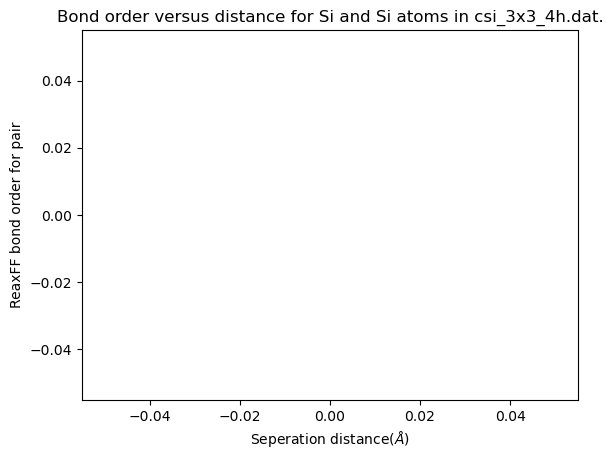

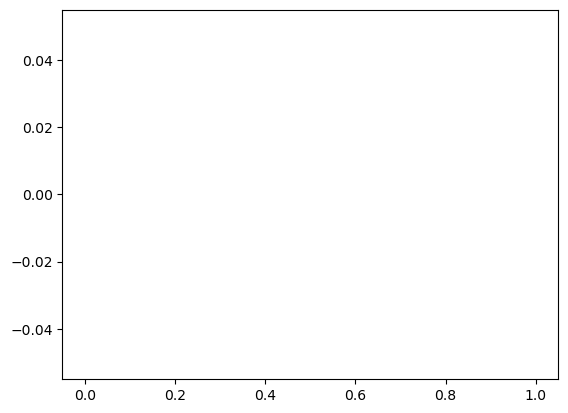

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas
import numpy as np
import py.NEBTools as nt

datapath="/home/adam/code/topcon-md/data/neb/"
datapath="/home/adam/code/topcon-md/testing_reax/data/"
dfile ="1.6-465.dat"
dfile="csi_3x3_4h.dat"
filename=dfile.removesuffix('.dat').removesuffix('.data').removesuffix('.dump')
bondfile=filename+".bonds"

(atoms,simbox) = nt.read_file_data_bonds(datapath,dfile)
midz=5
zext=(simbox[2,1]-simbox[2,0])

type1='Si'
type2=''

t1atoms=atoms[atoms['type']==type1]


distlist=[]
bolist=[]
obolist=[]
zlist=[]

for i, row in t1atoms.iterrows():
        curpos=row['pos']
        curz=curpos[2]
        
        if curz < 17:
            continue
        nindices = row['bonds']
        t2n=[]
        allt1neigh=[]
        
        for ni in nindices:
            n=ni[0]
            allt1neigh.append(n)
            bo=ni[1]
            
            neitype=atoms.at[n,'type']
            neipos=atoms.at[n,'pos']
            nz=neipos[2]
            if neitype ==type2:
                t2n.append(n)
                
                dist=nt.pbc_dist(simbox,curpos,neipos)
                
                
                if (curz > midz and nz < midz):
                    nz+=zext
                if (curz < midz and nz > midz):
                    curz+=zext
                avgz=(curz+nz)/2
                
                distlist.append(dist)
                zlist.append(avgz)
                bolist.append(bo)
                
                # if dist > 2:
                #     print(f"ParticleIdentifier=={i}||ParticleIdentifier=={n}")
            
            
        # for nei in t2n:
        #     neibonds = atoms.at[nei,'bonds']
            
        #     for neib in neibonds:
        #         nei=neib[0]
        #         neibo=neib[1]
        #         neineitype = atoms.at[nei,"type"]
                
        #         if neineitype ==type1:
        #             for ni in nindices:
        #                 if nei == ni[0]:
        #                     obolist.append(nei[1])
                        

fig, ax = plt.subplots()
plt.title(f'Bond order versus distance for {type1} and {type2} atoms in {dfile}.')
plt.ylabel("ReaxFF bond order for pair")
plt.xlabel(r'Seperation distance($\AA$)')
ax.scatter(distlist,bolist)
# ax.set_ylim(0.7)
plt.show()

# fig, ax = plt.subplots()
# plt.title(f'Seperation distance versus average z for pairs on {type1} and {type2} in {dfile}.')
# ax.scatter(zlist,distlist)
# plt.ylabel(r'Seperation distance($\AA$)')
# plt.xlabel(r'Average z coordinate of a pair of atoms($\AA$)')
# plt.show()


# ax.scatter(zlist,distlist)

plt.hist(distlist,25)
plt.show()

                
                
                

In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import py.NEBTools as nt
from IPython.display import display, HTML


datapath="/home/agoga/documents/code/topcon-md/data/neb/"
dfile ="1.8-563.dat"
filename=dfile.removesuffix('.dat').removesuffix('.data').removesuffix('.dump')

(atoms,simbox) = nt.read_file_data_bonds(datapath,dfile)
close=nt.atoms_in_radius(atoms,simbox,1,5)
print(close.to_string())


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
     type         q          x          y          z                                                            pos nb                                                                     bonds      dist
id                                                                                                                                                                                                        
2      Si -0.079973   2.491411   2.240447   0.603007   [2.4914107933193943, 2.2404467671012775, 0.6030071848072305]  5          [[1, 0.817], [92, 0.538], [93, 0.804], [101, 0.951], [6, 0.817]]  2.241848
3      Si -0.009975   2.318436   5.032381   2.969141    [2.3184357294506466, 5.032381286714575, 2.9691414432495087]  4                        [[4, 0.757], [6, 0.793], [13, 0.774], [20, 0.773]]  4.429566
5      Si  0.020546   5.109902   2.345737   3.047204     [5.109902446990848, 2.3457371712643083, 3.0

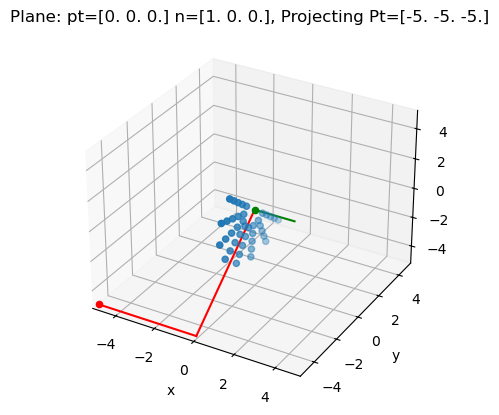

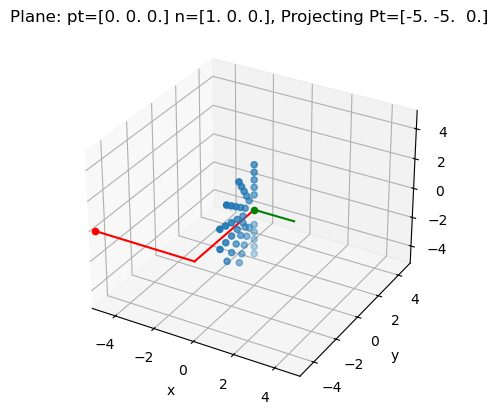

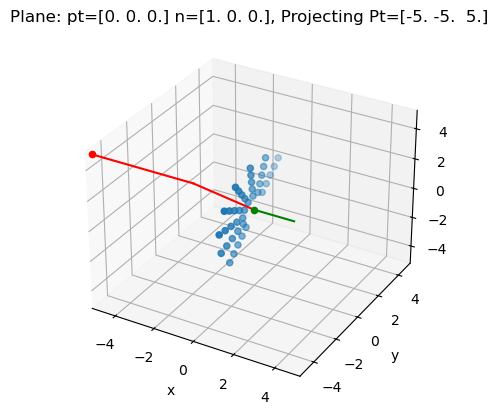

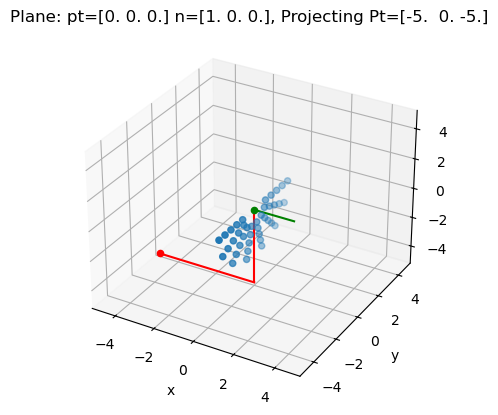

projection is [0,0,0]


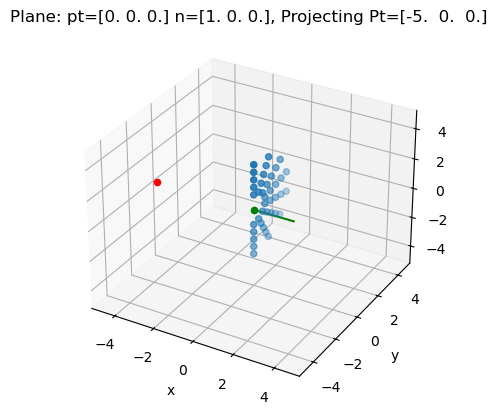

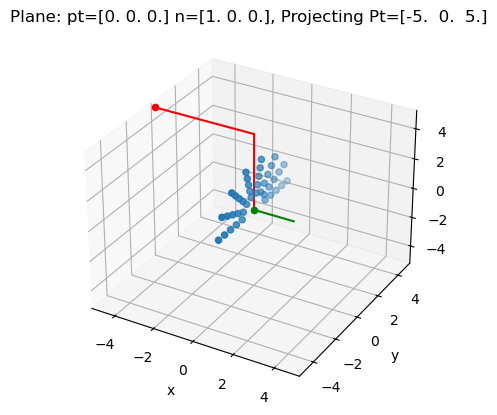

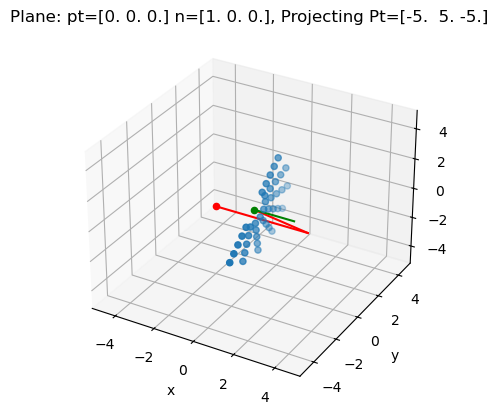

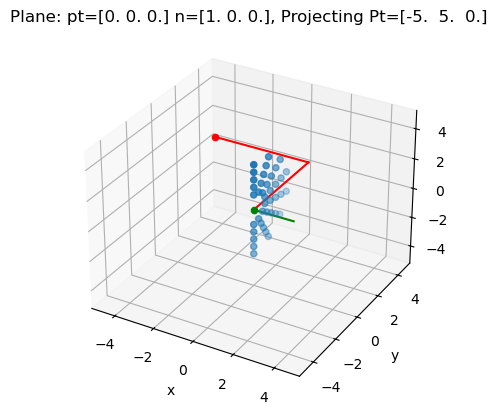

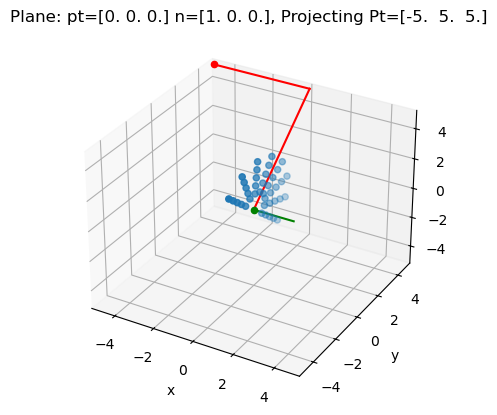

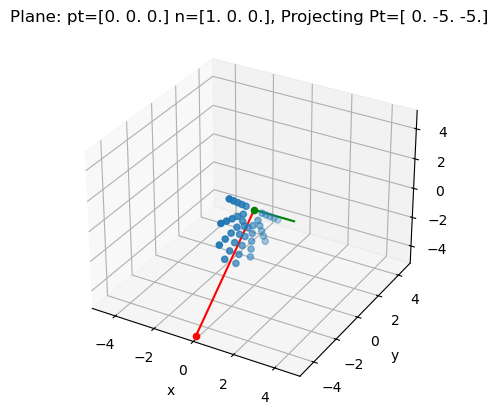

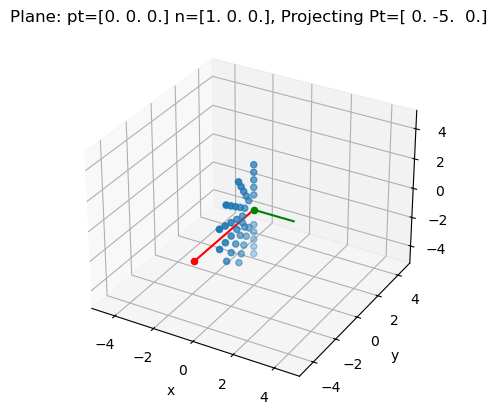

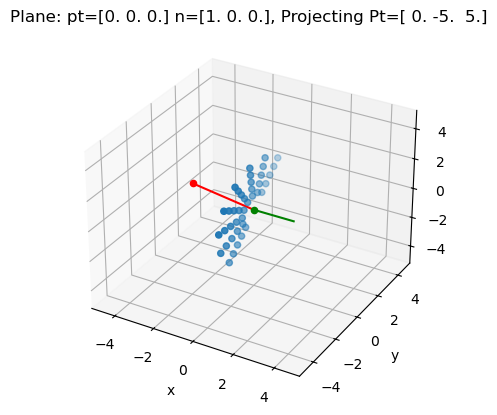

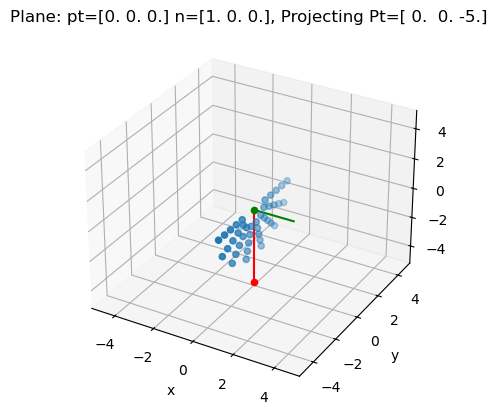

projection is [0,0,0]


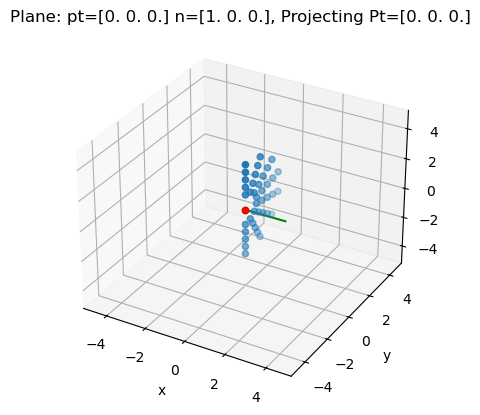

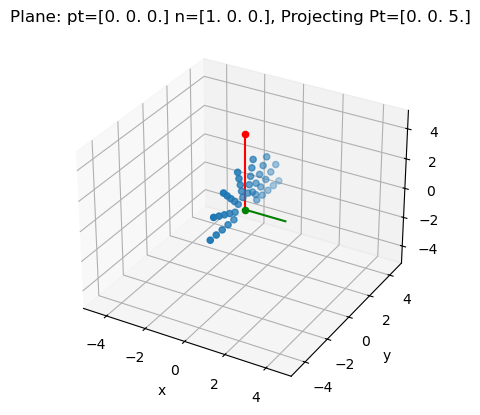

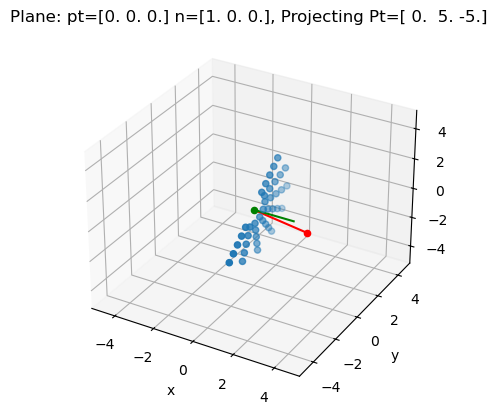

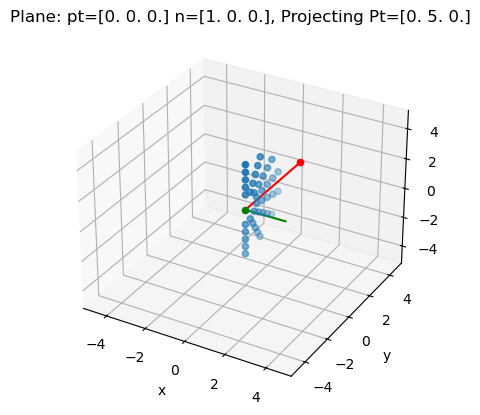

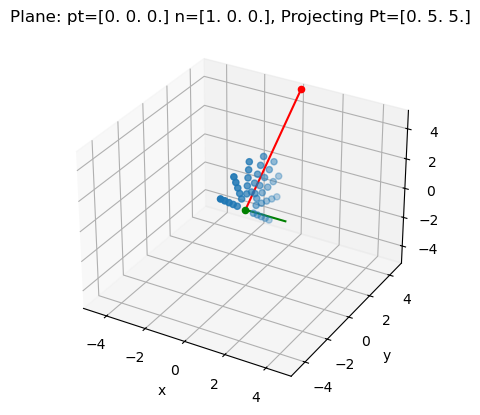

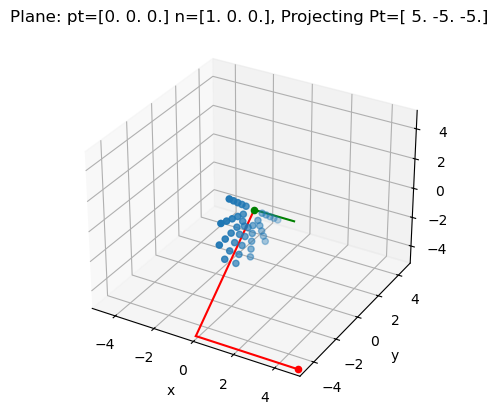

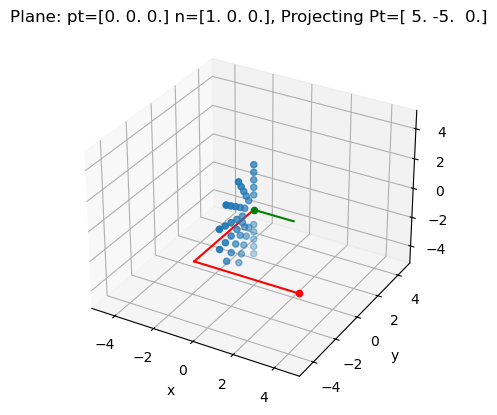

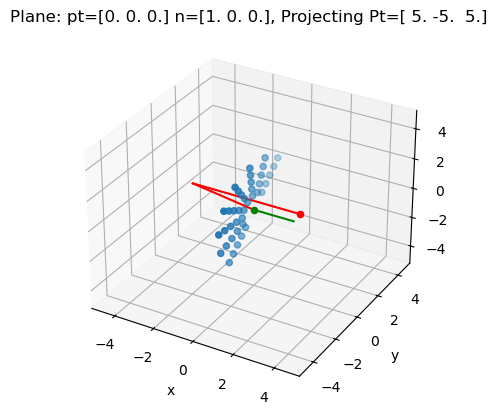

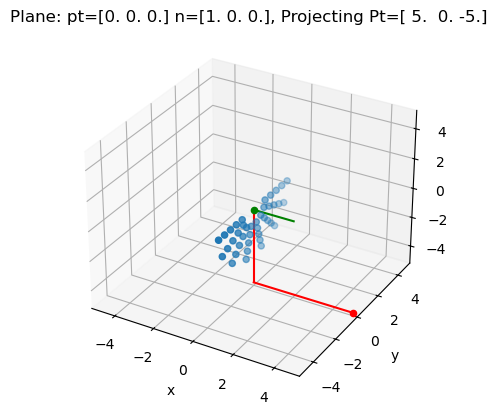

projection is [0,0,0]


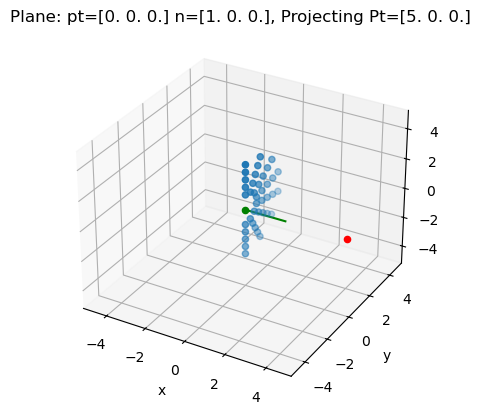

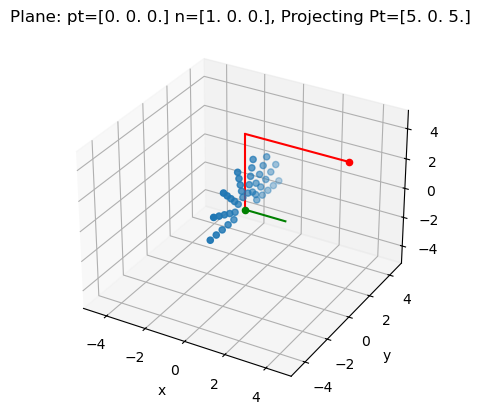

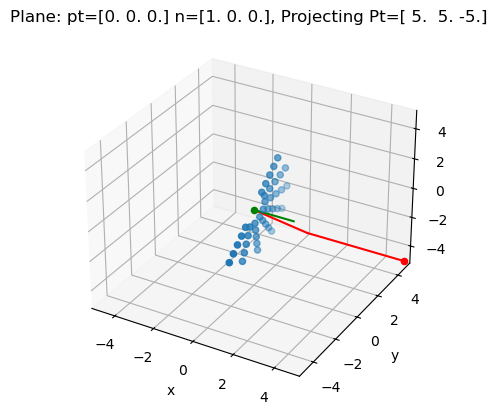

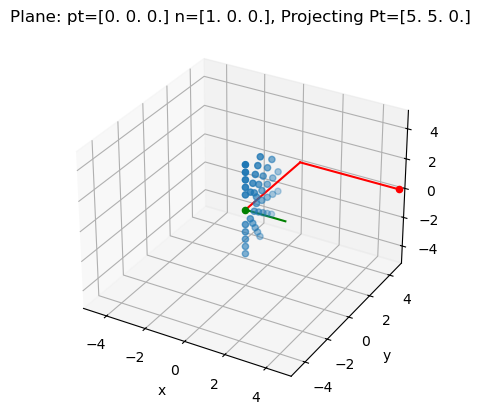

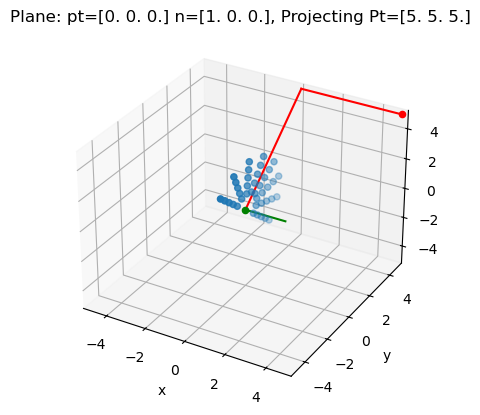

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

from sympy import Point3D, Line3D, Plane
import py.NEBTools as nt
import numpy as np
from sympy.abc import u,v


box=np.array([[-50,50],[-50,50],[-50,50]])

for mid_x in np.linspace(-5,5,3):
    for mid_y in np.linspace(-5,5,3):
        for mid_z in np.linspace(-5,5,3):
            
            ax = plt.figure().add_subplot(projection='3d')
            
            midpoint=np.array([0,0,0],dtype=float)#point
            orig=np.array([mid_x,mid_y,mid_z],dtype=float)#point
            sepvec=np.array([1,0,0],dtype=float)#vector

            dplane=Plane(Point3D(midpoint),normal_vector=sepvec)
            parametrizedpt=dplane.arbitrary_point(u,v)
            zpoint_plane=np.array(parametrizedpt.subs({u:np.cos(0),v:np.sin(0)}).evalf(),dtype=float)-midpoint
            
            anginplane_orig=nt.angle_in_plane(box,midpoint,sepvec,orig,zpoint_plane,ax)
            
            
            # print(f"orig_plane_proj:{opp_vec} plane_zero_vec:{plane_zero_vec} anginplane_orig:{anginplane_orig}")
            tstart=anginplane_orig-(np.pi/2)
            #print(f"{anginplane_orig}-{(np.pi/2)} = {tstart}")
            rtot=5
            angtot=8
            pts=[]
            tstep=0 #2*np.pi/(2*angtot)
            
            for radius in np.linspace(1,3,rtot):
                for theta in np.linspace(tstart,tstart+np.pi,angtot): #,endpoint=False):#do this is we're going a full 2pi

                    newpt=parametrizedpt.subs({u:radius*np.cos(theta),v:radius*np.sin(theta)}).evalf()
                    pts.append(newpt)
                tstart+=tstep
                
                
                
            nppts=np.array(pts).T

            

            ax.scatter(midpoint[0],midpoint[1],midpoint[2],c='g')
            ax.scatter(orig[0],orig[1],orig[2],c='r')

            

            planevec=midpoint+2*sepvec
            pltv=np.array([midpoint,planevec]).T
            ax.plot(pltv[0],pltv[1],pltv[2],color='g')

            ax.scatter(nppts[0], nppts[1], nppts[2])
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_xlim(-5,5)
            ax.set_ylim(-5,5)
            ax.set_zlim(-5,5)
            ax.set_title(f"Plane: pt={midpoint} n={sepvec}, Projecting Pt={orig}")
            plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dump loaded with SiOx, x=1.5649350649350648
[53.67546794 53.67546794 32.20528076]
5.37 x 5.37 x 2.50
Dump loaded with SiOx, x=1.3353658536585367
[53.9158526  53.9158526  32.34951156]
5.39 x 5.39 x 2.50


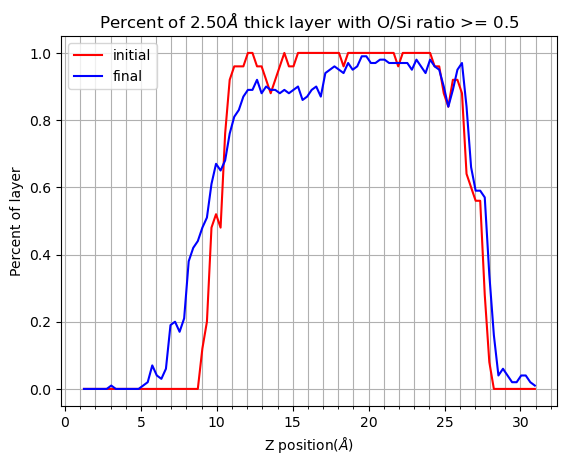

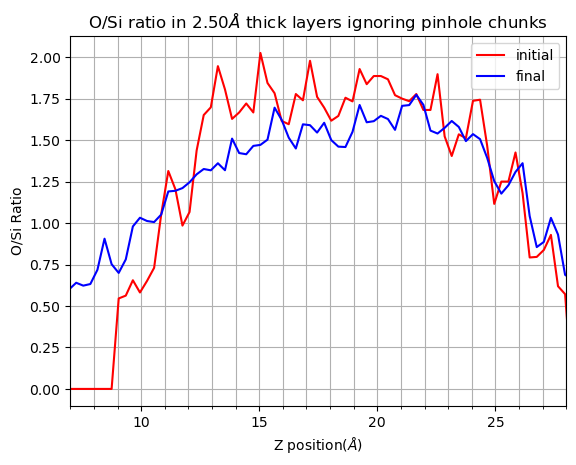

In [75]:
%load_ext autoreload
%autoreload 2
import py.StudyInterface as si

data_folder_1300="/home/adam/code/topcon-md/data/interface_study/Hcon-1300/"
file_1300="Hcon-1300-110.dump"
dump_file_1300=data_folder_1300+file_1300

data_folder_1400="/home/adam/code/topcon-md/data/interface_study/Hcon-1400-R1/"
file_1400="Hcon-1400-110.dump"
dump_file_1400=data_folder_1400+file_1400

data_folder_1600="/home/adam/code/topcon-md/data/interface_study/Hcon-1600/"
file_1600="Hcon-1600-110.dump"
dump_file_1600=data_folder_1600+file_1600

file_high_h="Hcon-1400-1.dump"
dump_file_high_h=data_folder_1400+file_high_h

data_folder_combo="/home/adam/Downloads/temp/"
dump_file_combo="Hcon-1400-440_combo.dump"

# si.track_O2_dump(data_folder_combo,dump_file_combo,'O',req_steps=[0,-1])

#si.compare_iface_pos_multi([dump_file_1400,dump_file_1300,dump_file_1600],-1,ratio=0.5,step_size=.2,thickness=1.5,xy_slices=5)
si.compare_iface_pos(data_folder_combo+dump_file_combo,[0,-1],ratio=.5,step_size=.3,thickness=2.5,xy_slices=10)

# si.compare_iface_pos(dump_file_1400,[3,-1],ratio=0.5,step_size=.3,thickness=1.5,xy_slices=5)
# si.compare_iface_pos(dump_file_1600,[3,-1],ratio=2,step_size=1,thickness=2,xy_slices=5)
# si.compare_iface_pos_z(dump_file_1300,[0,-1],ratio=0.5,step_size=.3,thickness=2)
# si.compare_iface_pos_z(dump_file_1400,[0,-1],ratio=0.5,step_size=.3,thickness=2)
# si.compare_iface_pos_z(dump_file_1600,[0,-1],ratio=0.5,step_size=.3,thickness=2)

